In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import numpy as np
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')
import os

# Data Exploration Tasks

In [12]:
print(os.getcwd())

C:\Users\arsal\opencv\Scripts\OFSTED\notebooks


In [13]:
os.chdir('../data/processed')

In [14]:
combined_ofsted_df = pd.read_csv(os.getcwd() + '/ComponentOneData.csv')
combined_ofsted_df.shape

(6396, 36)

1. Examine the distributions of all the numeric features, noting unusual aspects of their distribution that might be useful later. You only need a bullet point for each unusual aspect (e.g. outliers or multiple peaks), you do not need to comment on a distribution that is well behaved.

**Hint:** Try to automate the production of the histograms using a for-loop.

PNORG Quantile Low: 0.0 Quantitle High: 100.0
PNORB Quantile Low: 0.0 Quantitle High: 100.0
PSENELSE Quantile Low: 0.0 Quantitle High: 100.0
PSENELK Quantile Low: 0.0 Quantitle High: 47.44000000000014
PNUMEAL Quantile Low: 0.0 Quantitle High: 76.5
PNUMENGFL Quantile Low: 23.294999999999998 Quantitle High: 100.0
PNUMUNCFL Quantile Low: 0.0 Quantitle High: 4.605000000000017
PNUMFSM Quantile Low: 0.018939881472102113 Quantitle High: 0.6
PNUMFSMEVER Quantile Low: 5.195 Quantitle High: 80.0
PERCTOT Quantile Low: 3.2 Quantitle High: 24.42000000000007
TPUP Quantile Low: 4.0 Quantitle High: 298.0500000000002


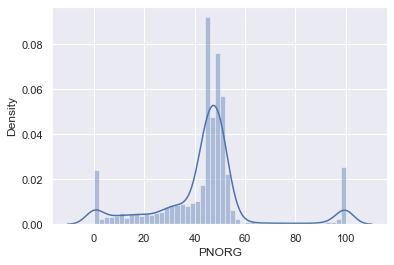

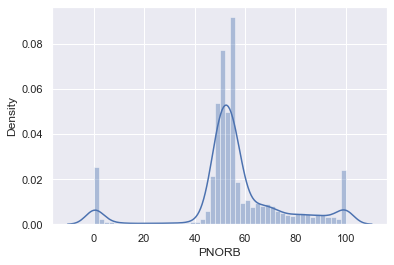

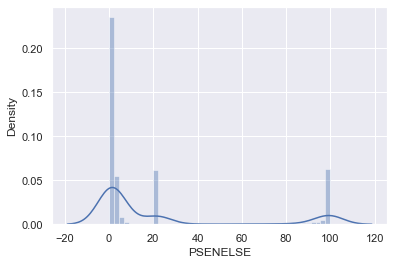

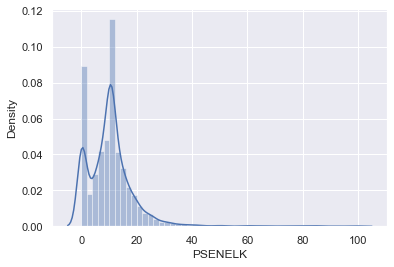

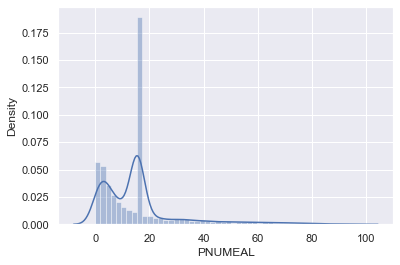

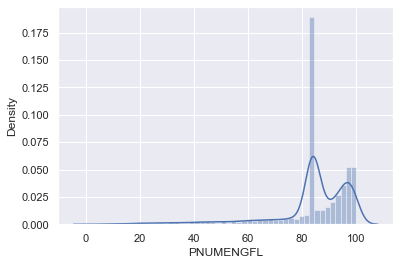

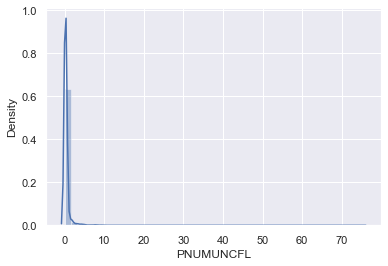

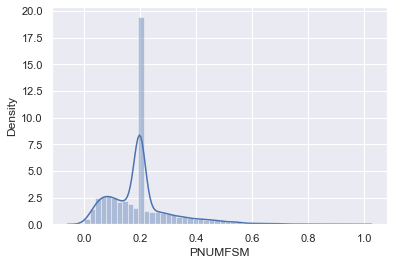

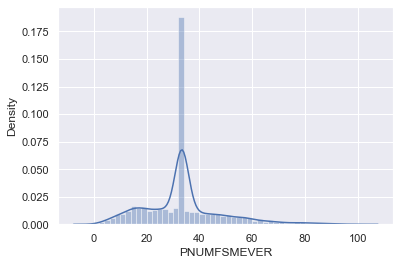

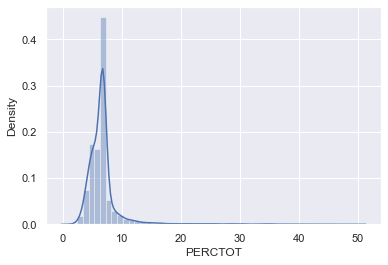

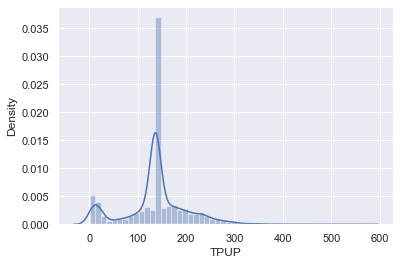

In [15]:
## printing low quantile and high quantile for outliers
df = combined_ofsted_df.loc[:,combined_ofsted_df.dtypes == float]
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col],kde=True)
    print(col + ' Quantile Low: ' + str(df[col].quantile(0.01)) + ' Quantitle High: ' + str(df[col].quantile(0.99)))

2. Produce the visualisation below showing the distribution of the PNORG feature with added information:

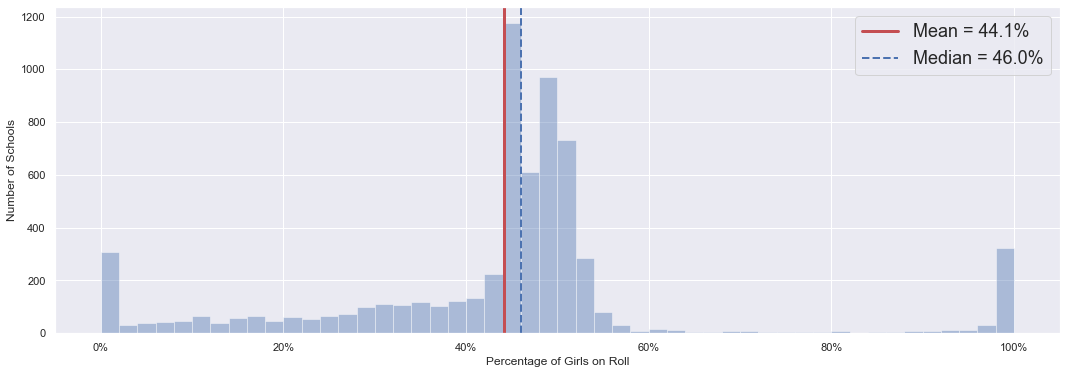

In [16]:
fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(combined_ofsted_df['PNORG'],kde=False,ax=ax)

ax.set_xlabel('Percentage of Girls on Roll')
ax.set_ylabel('Number of Schools')

mean = combined_ofsted_df['PNORG'].mean()
median = combined_ofsted_df['PNORG'].median()

plt.axvline(mean, color='r', linestyle='-',linewidth=3)
plt.axvline(median, color='b', linestyle='--',linewidth=2)

L = ax.legend({mean,median}, fontsize=18)
L.get_texts()[0].set_text('Mean = {}%'.format(round(mean,1)))
L.get_texts()[1].set_text('Median = {}%'.format(round(median,1)))

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax.xaxis.set_major_formatter(tick)

3. Examine the distribution of the non-numeric or mixed features, again noting unusual aspects. 

**Hint:** If a feature is numeric with a non-numeric value as a placeholder for missing or invalid values, you could temporary replace the non-numeric flag with a special numeric value to allow visualisation of the overall distribution.

PPERSABS10 Quantile Low: 4.2 Quantitle High: 62.51000000000003
P8PUP Quantile Low: 9.0 Quantitle High: 290.0
ATT8SCR Quantile Low: 0.8 Quantitle High: 73.305
P8MEA Quantile Low: -2.3905 Quantitle High: 0.96
P8CILOW Quantile Low: -3.12 Quantitle High: 0.74
P8CIUPP Quantile Low: -1.7109999999999999 Quantitle High: 1.19
EBACCAPS Quantile Low: 0.03 Quantitle High: 6.951000000000004
PTL2BASICS_94 Quantile Low: 0.0 Quantitle High: 0.994
PTL2BASICS_95 Quantile Low: 0.0 Quantitle High: 0.967
PTEBACC_E_PTQ_EE Quantile Low: 0.0 Quantitle High: 0.9380500000000002
PTEBACC_94 Quantile Low: 0.0 Quantitle High: 0.8001000000000005
PTEBACC_95 Quantile Low: 0.0 Quantitle High: 0.685800000000003
PT5EM_94 Quantile Low: 0.0 Quantitle High: 0.993
P8_BANDING Quantile Low: 1.0 Quantitle High: 5.0
OVERALL_DESTPER Quantile Low: 0.6395000000000001 Quantitle High: 1.0
NOT_SUSTAINEDPER Quantile Low: 0.0 Quantitle High: 0.3110000000000036
UNKNOWNPER Quantile Low: 0.0 Quantitle High: 0.08
OVERALL_DESTPER_DIS Quantil

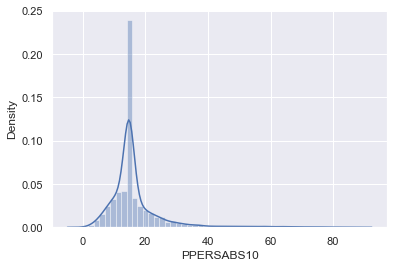

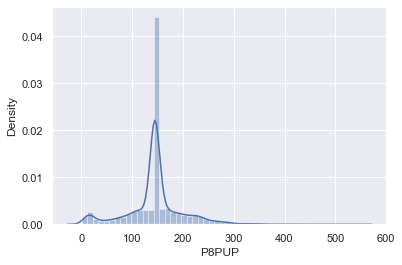

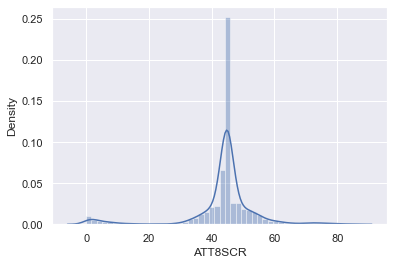

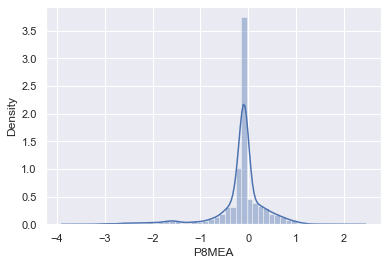

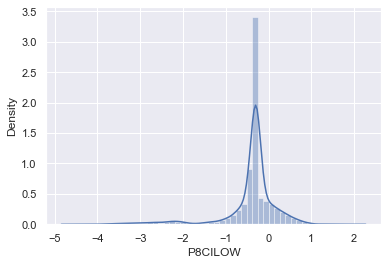

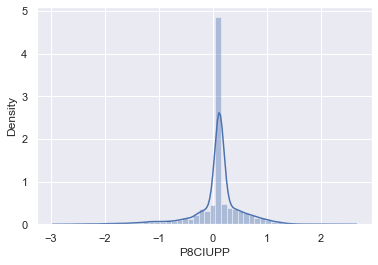

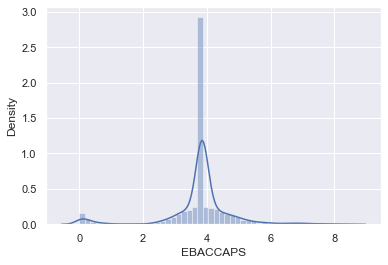

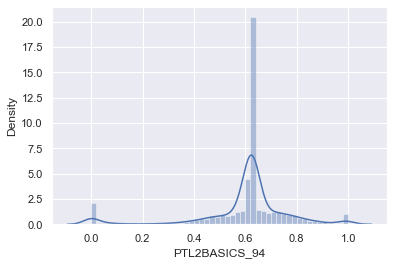

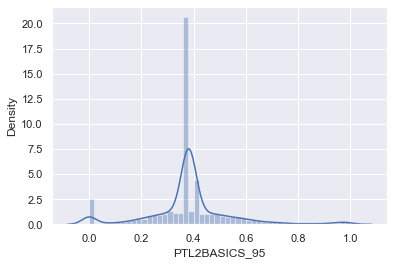

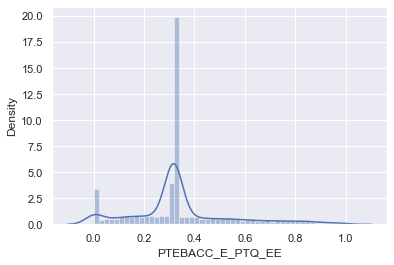

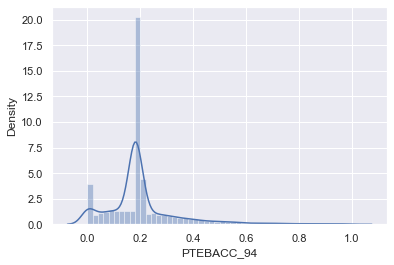

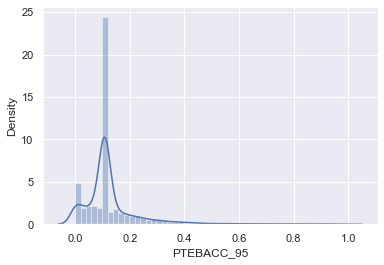

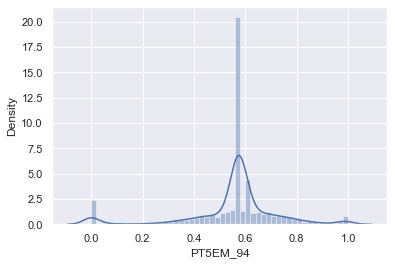

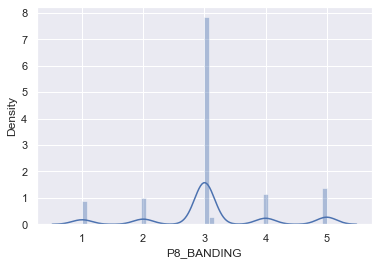

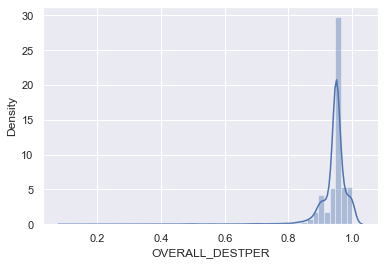

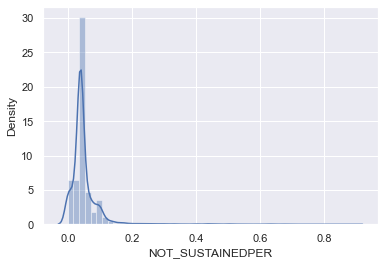

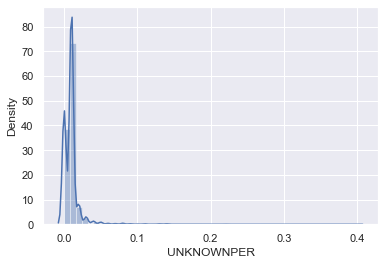

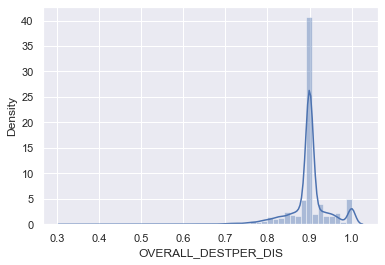

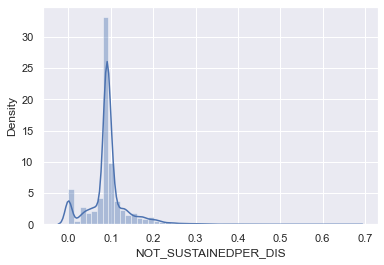

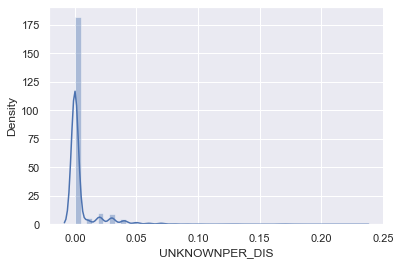

In [17]:
## replacing non-numeric values with mean
## printing low quantile and high quantile for outliers
df = combined_ofsted_df.loc[:,combined_ofsted_df.dtypes == object].drop(columns=['GENDER','RELCHAR','Rating'])
for i, col in enumerate(df.columns):
    mean = round(df[col].transform(pd.to_numeric, errors='coerce').mean(),1)
    dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
    plt.figure(i)
    df[col] = df[col].replace(dictMean) # Replace placeholder with mean of the column
    df[col] = df[col].astype(float) # converting column in float so it can calculate Quantitle
    print(col + ' Quantile Low: ' + str(df[col].quantile(0.01)) + ' Quantitle High: ' + str(df[col].quantile(0.99)))
    sns.distplot(df[col],kde=True)    

4. Finally, examine the distribution of the truly non-numeric features by looking at the frequency of each of the values. Again, note anything that may be useful later.

In [18]:
combined_ofsted_df[['GENDER','RELCHAR','Rating']].describe().transpose()

## 3 unique values with mostly mixed schools in gender with freq 5590
## 41 unique values with mostly None in RELCHAR with freq 2658
## 6 unique values with mostly Good Rating with freq 2719

,count,unique,top,freq
GENDER,6396,3,Mixed,5590
RELCHAR,6396,41,None,2658
Rating,6396,6,Good,2719


<AxesSubplot:xlabel='GENDER', ylabel='count'>

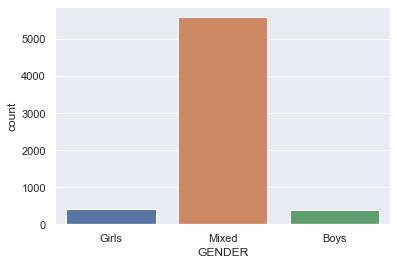

In [19]:
sns.countplot(x="GENDER", data=combined_ofsted_df)

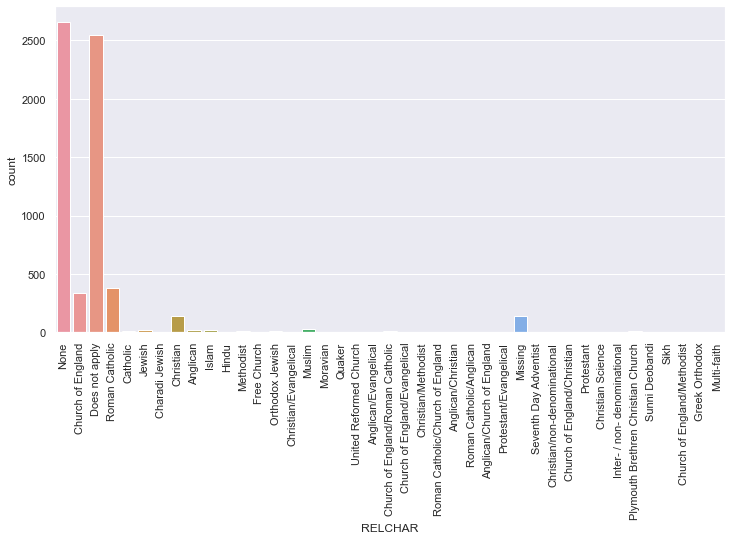

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="RELCHAR", data=combined_ofsted_df,ax=ax)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Rating', ylabel='count'>

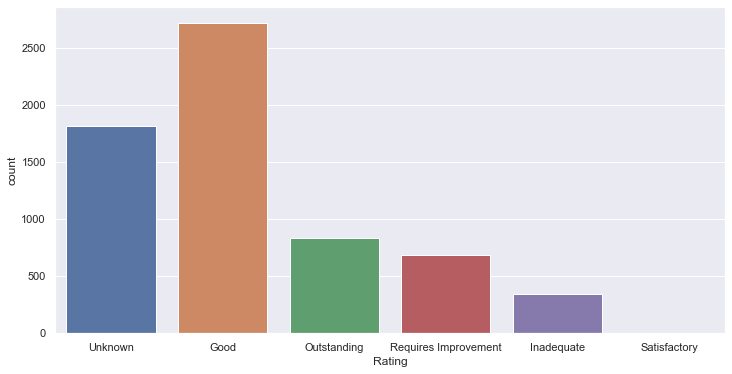

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="Rating", data=combined_ofsted_df,ax=ax)

5. Data exploration also includes looking at the relationship between variables. Examine the correlation between the proportion of children receiving free school meals in a school and that school’s Progress 8 score. Produce the visualisation below, calculate the correlation, evaluate its strength and write a short note about what you find.

In [22]:
df = combined_ofsted_df[['PNUMFSM', 'P8MEA']]

for col in df.columns:
    mean = round(df[col].transform(pd.to_numeric, errors='coerce').mean(),1)
    dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
    df[col] = df[col].astype(object).replace(dictMean)

df['PNUMFSM'] = df['PNUMFSM'].astype(float) * 100
df['P8MEA'] = df['P8MEA'].astype(float)

Text(0, 0.5, 'Progress 8 Adjusted Score')

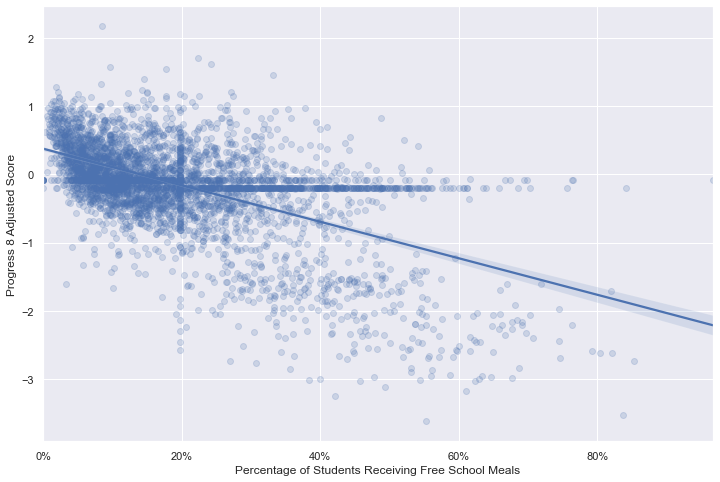

In [23]:
## Data is showing more towards on x-axis 0 and y-axis 1 and -1 
##because I have imputed missing values and placeholders with mean. 
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(data = df ,x='PNUMFSM', y='P8MEA',scatter_kws={'alpha':0.2});
# plt.xlim(-0.9)
# plt.ylim(-8)

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Percentage of Students Receiving Free School Meals')
ax.set_ylabel('Progress 8 Adjusted Score')

6. Examine the correlation between a school’s Progress 8 score and its average Attainment 8 score. Write a short note about what you find.

**P8MEA** Progress 8 measure after adjustment for extreme scores


**ATT8SCR** Average Attainment 8 score per pupil

In [24]:
## replacing non-numeric values with mean so it will generate correlation
df = combined_ofsted_df[['ATT8SCR','P8MEA']]

for col in df.columns:
    mean = round(df[col].transform(pd.to_numeric, errors='coerce').mean(),1)
    dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
    df[col] = df[col].replace(dictMean)



df.astype(float).corr()

,ATT8SCR,P8MEA
ATT8SCR,1.000000,0.898902
P8MEA,0.898902,1.000000


A positive correlation between a school’s Progress 8 score and its average Attainment 8 score 

7. Produce a violinplot like the one below to examine the relationship between the Progress 8 score (P8MEA) and the banding (P8_BANDING). Provide the labels as they appear in the figure below.

In [25]:
# imputing placeholders with -1 value so it will generate the same visualization as required
df = combined_ofsted_df[['P8_BANDING','P8MEA']]

for col in df.columns:
    placeholder = -1
    dictMean = {'NE': placeholder, 'SUPP': placeholder, 'NP': placeholder, 'LOWCOV': placeholder,'SP': placeholder}
    df[col] = df[col].replace(dictMean)
    df[col] = df[col].astype(float)

Text(0, 0.5, 'Progress 8 Measure After Adjustment')

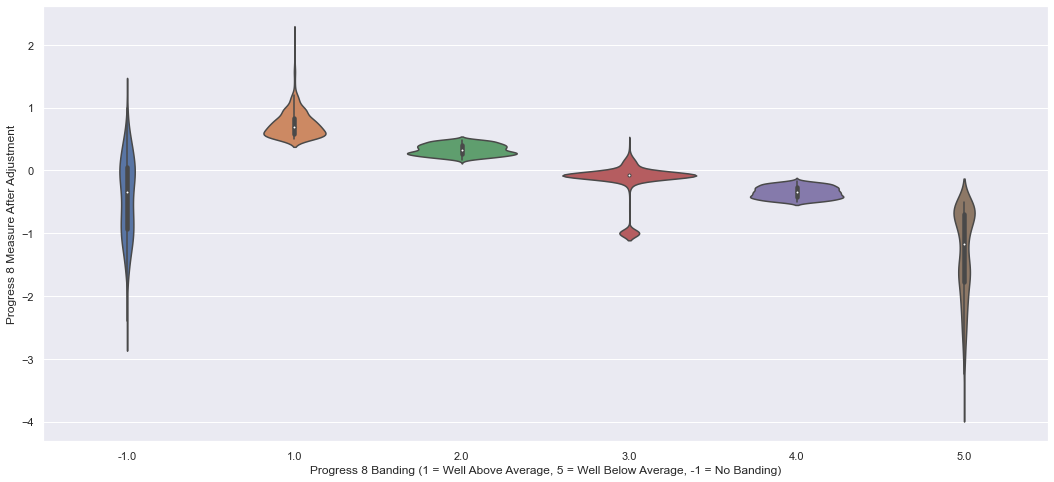

In [26]:
fig, ax = plt.subplots(figsize=(18,8))
sns.violinplot(data = df ,x='P8_BANDING', y='P8MEA');

ax.set_xlabel('Progress 8 Banding (1 = Well Above Average, 5 = Well Below Average, -1 = No Banding)')
ax.set_ylabel('Progress 8 Measure After Adjustment')

8. Data exploration is not limited to visualisations. Incorporate the data in the sheet “la_and_region_codes_meta” to discover which Local Authority (LA) has the highest average Attainment 8 score and the highest Progress 8 score. Likewise, find the LA with the lowest scores and the one with the biggest range of values.

In [27]:
## replacing non-numeric values with mean
dfLaAndP8 = combined_ofsted_df[['LA','P8MEA','ATT8SCR']]

mean = round(dfLaAndP8['P8MEA'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
dfLaAndP8['P8MEA'] = dfLaAndP8['P8MEA'].replace(dictMean).astype(float)

mean = round(dfLaAndP8['ATT8SCR'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
dfLaAndP8['ATT8SCR'] = dfLaAndP8['ATT8SCR'].replace(dictMean).astype(float)

In [28]:
dfLACodes = pd.read_csv('la_and_region_codes_meta.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'la_and_region_codes_meta.csv'

In [ ]:
merge1_df = pd.merge(dfLaAndP8,dfLACodes, how='left', left_on='LA', right_on='LEA')
merge1_df['P8MEA'] = merge1_df['P8MEA'].fillna(merge1_df['P8MEA'].mean())
merge1_df['ATT8SCR'] = merge1_df['ATT8SCR'].fillna(merge1_df['ATT8SCR'].mean())

Local Authority (LA) has the highest average Attainment 8 score and the highest Progress 8 score

In [ ]:
highestAttainment = merge1_df[merge1_df['ATT8SCR'] == merge1_df['ATT8SCR'].max()]
print('Highest Avg Attainment 8 Score: '+  highestAttainment['ATT8SCR'].to_string(index=False) + ' where LA Name: '+  highestAttainment['LA Name'].to_string(index=False))

In [ ]:
highestProgress = merge1_df[merge1_df['P8MEA'] == merge1_df['P8MEA'].max()]
print('Highest Progress 8 Score: '+  highestProgress['P8MEA'].to_string(index=False) + ' where LA Name: '+  highestProgress['LA Name'].to_string(index=False))

LA with the lowest scores

In [ ]:
lowestAttainment = merge1_df[merge1_df['ATT8SCR'] == merge1_df['ATT8SCR'].min()]

print('Lowest Avg Attainment 8 Score: '+  lowestAttainment['ATT8SCR'].to_string(index=False) + ' where LA Name: '+  lowestAttainment['LA Name'].to_string(index=False))

In [ ]:
lowestProgress = merge1_df[merge1_df['P8MEA'] == merge1_df['P8MEA'].min()]
print('Lowest Progress 8 Score: '+  lowestProgress['P8MEA'].to_string(index=False) + ' where LA Name: '+  lowestProgress['LA Name'].to_string(index=False))

The one with the biggest range of values

In [ ]:
merge1_df[merge1_df['ATT8SCR'] <= (merge1_df['ATT8SCR'].max() - merge1_df['ATT8SCR'].min())][['LA Name','ATT8SCR']].sample(10)

In [ ]:
merge1_df[merge1_df['P8MEA'] <= (merge1_df['P8MEA'].max() - merge1_df['P8MEA'].min())][['LA Name','P8MEA']].sample(10)

9. Using the same data, find which regions have the highest and lowest Attainment 8 scores and Progress 8 scores.

In [ ]:
print('Highest Avg Attainment 8 Score: '+  highestAttainment['ATT8SCR'].to_string(index=False) + ' where REGION NAME: '+  highestAttainment['REGION NAME'].to_string(index=False))

In [ ]:
print('Highest Progress 8 Score: '+  highestProgress['P8MEA'].to_string(index=False) + ' where REGION NAME: '+  highestProgress['REGION NAME'].to_string(index=False))

In [ ]:
print('Lowest Avg Attainment 8 Score: '+  lowestAttainment['ATT8SCR'].to_string(index=False) + ' where REGION NAME: '+  lowestAttainment['REGION NAME'].to_string(index=False))

In [ ]:
print('Lowest Progress 8 Score: '+  lowestProgress['P8MEA'].to_string(index=False) + ' where REGION NAME: '+  lowestProgress['REGION NAME'].to_string(index=False))

10. There are many regions which are parts of larger regions. Combine all the “London” regions into one region called “London”, all the “Yorkshire” regions into one called “Yorkshire” and all those regions which are labelled A, B, C or D (e.g. “South West B”) into one region. Then produce the visualisation below to see the average Attainment 8 Score for each of these wider regions and the 95% confidence intervals:

In [ ]:
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('London') == True,'REGION NAME'] = 'London'
merge1_df.loc[merge1_df['REGION NAME'].str.contains('Yorkshire') == True,'REGION NAME'] = 'Yorkshire'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('South West') == True,'REGION NAME'] = 'South West'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('South East') == True,'REGION NAME'] = 'South East'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('East of England') == True,'REGION NAME'] = 'East of England'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('North West') == True,'REGION NAME'] = 'North West'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('West Midlands') == True,'REGION NAME'] = 'West Midlands'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('North East') == True,'REGION NAME'] = 'North East'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('East Midlands') == True,'REGION NAME'] = 'East Midlands'

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(x=merge1_df['REGION NAME'],y=merge1_df['ATT8SCR'],data=merge1_df,ci=95)
ax.set_ylabel('Average Attainment 8 Score')
ax.set_xlabel('Wider Region')